# STA 208: Homework 2 (Do not distribute)

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 
2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

In [1]:
import numpy as np

In [2]:
## Simulate from the Poisson regression model (use y,X)
np.random.seed(180)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

__Answers__:

1. We have the following result for $l_i$:
\begin{eqnarray*}
l_i(\beta) & \propto & -log p(y_i | x_i, \beta) \\
&=& -log (\frac{\lambda^y_i}{y_i!} e^{-\lambda})  = -log (\frac{exp(\beta^Tx_i y_i)}{y_i!} e^{-exp(\beta^Tx)}) \\
&\propto & -\beta^T x_i y_i + e^{\beta^T x_i}.
\end{eqnarray*}
Therefore, we have
$$ \nabla l_i(\beta) =  -x_i y_i + x_i e^{\beta^T x_i} .$$

2. We have $\nabla^2 l_i(\beta) =   x_i e^{\beta^T x_i} x_i^T$ and $R_n(\beta) = \frac{1}{n} \sum_{i=1}^n l_i(\beta)$. So
$$
 \nabla^2 R_n(\beta) = \frac{1}{n} \sum_{i=1}^n \nabla^2 l_i(\beta) \frac{1}{n} \sum_{i=1}^n x_i e^{\beta^T x_i} x_i^T.
$$
For all vector $z \in R^p$, we have 
$$
 z^T \nabla^2 R_n(\beta) z = \frac{1}{n} \sum_{i=1}^n z^T x_i e^{\beta^T x_i} x_i^T z 
= \frac{1}{n} \sum_{i=1}^n e^{\beta^T x_i} \|x_i^T z\|^2 \geq 0.
$$
Therefore, $\nabla^2 R_n(\beta)$ is postive definite. So $R_n(\beta)$ is a convex
function of $\beta$.

3. Since $R_n(\beta)$ is a convex function of $\beta$, we know that at the minimizer of $R_n(\beta)$, $\hat \beta$, we have $\nabla R_n(\hat\beta) = 0$. Therefore, 
$$F(\hat\beta) = \hat\beta - \eta \nabla R_n(\beta) = \hat \beta.$$

4. Please see the code below. A figure is plot to show $\|\beta-\hat\beta\|^2$ against each iteration. The final $\|\beta-\hat\beta\|^2 = 0.00945503563366.$ We can see that with $1000$ data points, $\hat\beta$ already approaches the true $\beta$.

In [3]:
## code for Ex1 Q4:
def gra(X, y, bt):
    result = X.T @ np.exp(X @ bt) - X.T @ y
    return result/n

def GD(X, y, beta0, eta, max_ite, error):
    se = [np.linalg.norm(beta-beta0)**2]
    for i in range(max_ite):
        grad = gra(X, y, beta0)
        #print(grad)
        beta_new = beta0 - eta * grad
        if np.linalg.norm(beta_new-beta0) <= error:
            break
        beta0 = beta_new
        se += [np.linalg.norm(beta-beta0)**2]
        #print(i)
    return beta0, se

In [4]:
beta_start = np.zeros(p)
beta_hat, SE = GD(X, y, beta_start, 0.1, 1000, 0.000001)
mse = np.linalg.norm(beta_hat-beta)
# I set the seed to be 180 just to make sure it produces the same result every time you run it.
print(mse**2)  ## this is is final sum of square error
print(SE)  ## this is the sequence of sum of square error, it converges to a number close to zero as iteration increases

0.009455035633660201
[0.6919490895278312, 0.5180527957098273, 0.3843678603718559, 0.28273105679389304, 0.2065456075916052, 0.15033341787788296, 0.10951841966431398, 0.08032023535449932, 0.059687144458330864, 0.04522909675791382, 0.03513540036114519, 0.028078396504893365, 0.023112875271929026, 0.01958207145847684, 0.017037726167499222, 0.015177156823075355, 0.013796672701096298, 0.012758699896156304, 0.011969397121402851, 0.01136379498263662, 0.010896086009340986, 0.010533327852691569, 0.010251359621389294, 0.010032135125148743, 0.009861958811437093, 0.009730297965214995, 0.009628965849495612, 0.009551546949362411, 0.009492983174411359, 0.009449269433877775, 0.009417225314431047, 0.009394320996608, 0.009378542720116251, 0.009368287687251613, 0.009362281271584252, 0.009359511378935231, 0.009359176156270651, 0.009360642186026922, 0.009363410977455158, 0.00936709206000938, 0.00937138135230299, 0.009376043760077838, 0.009380899172268187, 0.009385811192247424, 0.009390678073415211, 0.0093954

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(range(1,len(SE)+1), SE, 'red')
plt.title('sum of square error between beta and beta hat')
plt.xlabel('iteration')
plt.ylabel('sum of square error')
plt.show()

<Figure size 640x480 with 1 Axes>

__Exercise 2__ (30 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$
where 
${\rm supp}(\beta) = \{j = 1\,\ldots,p : \beta_j \ne 0 \}$. Notice that we can write this as 
$$
\min_{\beta : \| \beta \|_0 \le k}\| y - X \beta \|_2^2,
$$
where 
1. Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  Describe the subspace that is the range of this projection.
2. Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ (it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?
3. Suppose that $X$ is orthogonal, then write a computationally efficient pseudocode to solve the subset selection problem.  Prove that it is correct (your algorithm actually solves subset selection under othogonal design).
4. (Challenge) Suppose that we have that $n = p$ and $y_i = \beta_i + \epsilon_i$ (identity design matrix) where $\epsilon_i$ satisfies 
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
for any $t > 0$ (this is true for central Normal RVs) for some $\sigma > 0$.
Suppose that there is some true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k < p$ and ${\rm supp}(\beta) = S_0$.
Prove the following.

__Proposition__
Define $\mu = \min_{j \in S_0} |\beta_j|$ and call $\mu / \sigma$ the signal-to-noise ratio.  Then if 
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$
then the true $S$ is selected by subset selection with probability at least $1 - \delta$.

Hint: rewrite the subset selection problem with $X = I$ and compare the objective at $S_0$ to any other $S$.


__Answers__:

1\. For a given support set $S$, we know that the best 
$$\hat \beta_S = (X_S^T X_S)^{-1} X_S^T y.$$ 
Let $H_S := X_S (X_S^T X_S)^{-1} X_S^T ,$ then 
$$\| y-X_S^T \hat\beta_S \|^2 = y^T (I-H_S)^T (I-H_S) y = y^T (I-H_S) y.$$
Let $P_S = I-H_S$, then 
$$min_{\{\beta: supp(\beta)\leq k \}} \| y-X_S^T \hat\beta_S \|^2
= min_{S \subset \{ 1,\dots,p\},|S|\leq k} y^T P_S y.$$
We know that $H_S$ is a projection matrix. Then $P_S^T = (I-H_S)^T = I-H_S$ and $P_S^2 = (I-H_S)^2 = I- 2H_S + H_S^2 = I-H_S=P_S$. Therefore, $P_S$ is also a projection matrix. The range of the projection is the orthogonal complement of the column space of the design matrix $X_S$.

2\. $X^TX$ is positive definite, so we can write $X^TX= VDV^T$ where $V$ is an orthogonal matrix. Let $\hat X = XV$, then all the columns of $\hat X$ are orthogonal. We also have
$$P_X = I-X (X^T X)^{-1} X^T = I- XVD^{-1} V^T X^T = I-\hat XD^{-1}\hat X^T.$$
Since $y^T P_S y = y^T P_S^T P_S y = \|P_Sy\|^2,$ and let's denote $\hat X_{S_{k+1}} = [\hat X_{S_k}, \hat x_{k+1}]$, and $D_{S_{k+1}} = diag\{ D_{S_k}, d_{k+1} \}$, then
$$P_{S_{k}}y = P_{S_{k+1}}y + (P_{S_{k}}-P_{S_{k+1}})y = P_{S_{k+1}}y + d_{k+1}^{-1}\hat x_{k+1} \hat x_{k+1}^T y.$$
Since $x_{k+1}$ and $S_{k}$ are orthogonal, then we have
$$\|P_{S_{k}}y\|^2 = \|P_{S_{k+1}}y\|^2 + \| d_{k+1}^{-1}\hat x_{k+1} \hat x_{k+1}^T y \|^2
\geq \|P_{S_{k+1}}y\|^2,$$
this is equivalent to 
$$y^T P_{S_{k}} y \geq y^T P_{S_{k+1}} y.$$
This tells us that even when the constraint is $|S| \leq k$, we will still select a model with $|S| =k$.

3\. When $X$ is orthogonal, we can assume $X^TX = diag\{ d_1, d_2,\dots,d_p \}$.
(denote $X_1= [x_1]$, $X_2=[x_1, x_2], \dots$)
$$H_2 = X_2 (X_2^T X_2)^{-1} X_2^T = [x_1, x_2]diag\{ d_1^{-1}, d_2^{-1} \} [x_1, x_2]^T = d_1^{-1} x_1 x_1^T + d_2^{-1}x_2 x_2^T = H_{x_1} + H_{x_2}.$$
Minimizing $y^T P_{S_{k}} y$ is equivalent to maximizing $y^T H_{S_{k}} y$.
Assume we are at the $k$-th step, which means we have already have a nested set of $S_k$ of size $k$ and we want to a model of size $k+1$. Then we only need to find the one with the maximum $y^T H_{x} y$ among the rest $p-k$ features. Details are shown in the algorithm below:

(i). $\mathbf r =[r_1,r_2,\dots,r_p] \gets [0, \dots, 0]$

(ii). For $i \in \{1,2,\dots,p\}$, compute $r_i \gets y^T x_i (x_i^T x_i)^{-1} x_i^T y$
        
(iii). Sort $r$ and get the sorted indexes $(i_1, \dots, i_p)$

(iv). Given subset size $k$, the model is $[x_{i_1}, \dots, x_{i_k}]$.


4\. Since $X=I$ is orthogonal, from question 3, we know that a feature $x_i$ is selected only if $y^T H_x y = |y_i|^2$ is bigger than the rest. Therefore, true $S_0$ is not selected if 
$$\max_{\{ j\notin S_0\}} |\beta_j + \epsilon_j| > \min_{\{ j\in S_0\}} |\beta_j + \epsilon_j|. $$
This gives us 
\begin{eqnarray*}
& & \max_{\{ j\notin S_0\}} |\epsilon_j| > \min_{\{ j\in S_0\}} |\beta_j + \epsilon_j| \\
&\Rightarrow &  \max_{\{ j\notin S_0\}} |\epsilon_j| > \min_{\{ j\in S_0\}} |\beta_j| - |\epsilon_j| \\
&\Rightarrow &  \max_{\{ j\notin S_0\}} |\epsilon_j| + \max_{\{ j\in S_0\}} |\epsilon_j|> \min_{\{ j\in S_0\}} |\beta_j|  \\ 
&\Rightarrow &  2\max_{j} |\epsilon_j| > \min_{\{ j\in S_0\}} |\beta_j| = \mu  \\ 
&\Rightarrow &  \max_{j} |\epsilon_j| >  \frac{\mu}{2}  
\end{eqnarray*}
So 
\begin{eqnarray*}
P(\text{true } S_0 \text{ is not selected} ) &\leq  &  P(\max_{j} |\epsilon_j| >  \frac{\mu}{2}  ) \\
&=& n\times 2exp (-\frac{\mu^2}{8\delta^2}) = 2n \times \frac{\delta}{2n} = \delta.
\end{eqnarray*}
Therefore, true $S_0$ is selected by subset selection with probability at least $1-\delta$.

__Exercise 3__ (40 pts)
For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the training dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).
2. Train and tune ridge regression using a validation set and compute the test error (square error loss).
3. Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.
4. Perform 3 without the lasso modification generating the lars path.  Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.
4. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.
5. If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.

In [6]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')
    plt.show()

In [8]:
import pickle
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

In [9]:
y_tr.shape

(1000,)

In [10]:
y_te.shape

(1000,)

__Answers__:

1\. I standize the full data (training data and test data) together. I fit OLS model on training dataset and compute the error on test dataset. The test error for this questions is $1.039644457085749$. Please see code below.

In [11]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

In [12]:
import pickle
import sklearn.preprocessing as preprocess
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

In [13]:
X = np.concatenate((X_tr, X_te))
y = np.concatenate((y_tr, y_te))

In [14]:
X = preprocess.normalize(X,axis=0) 
X_tr = X[:1000, :]
X_te = X[1000:, :]

In [15]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(X_tr, y_tr)
y_hat = lm.predict(X_te)
test_error = np.sum((y_hat-y_te)**2)/len(y_hat)
test_error

1.0396444570857495

2\. I tune ridge regression by leave one out error for training data. Below is the plots of test error against $\lambda$'s. The optimal $\hat \lambda = 0.000246$ and it has test error $\hat{error} = 1.038817566401069$.

In [16]:
lamdas = np.linspace(0.001**3,0.001,200)
model_ridge = RidgeCV(alphas = lamdas, store_cv_values=True, normalize=False)
model_ridge.fit(X_tr, y_tr)
cv_vals = model_ridge.cv_values_
LOOridge = cv_vals.mean(axis=0)
lamda = lamdas[np.argmin(LOOridge)]
lamda

0.00024623190954773874

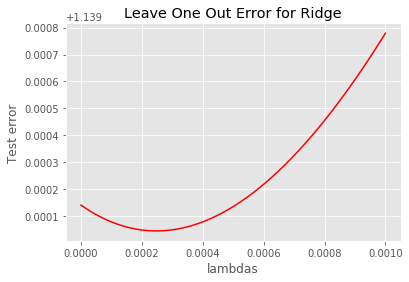

In [17]:
plt.plot(lamdas, LOOridge, 'r', label = 'Test Error for Ridge')
plt.xlabel('lambdas')
plt.ylabel('Test error')
plt.title('Leave One Out Error for Ridge')
plt.show()

In [18]:
ridge = Ridge(alpha = lamda, fit_intercept=False)
ridge.fit(X_tr, y_tr)
y_hat_rg = ridge.predict(X_te)
np.mean((y_hat_rg - y_te)**2)

1.0388175664010697

3\. Below is the figure of lasso path and test error for each returned lasso coefficient. The minimum test error is reached at $\lambda=0.0003893$ and $\hat{error}=0.994295$.

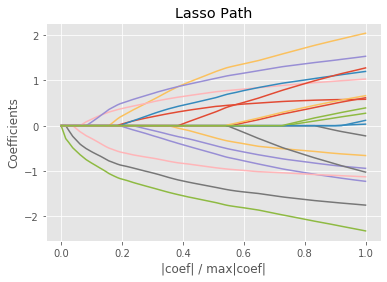

In [19]:
from sklearn.linear_model import lars_path, Lasso
plot_range = range(40,60)
lasso_path = lars_path(X_tr, y_tr, method='lasso')
lars_path = lars_path(X_tr, y_tr, method='lar')
plot_lars(lasso_path[2][plot_range,:], lines=False, title="Lasso Path")

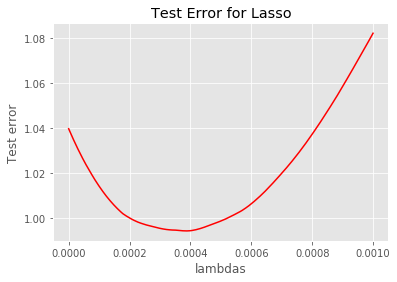

(0.00038939, 0.9942953189180962)

In [20]:
ls = np.linspace(0.001,0.001**3,1000)
betas = np.zeros((X_tr.shape[1], len(ls)))
betas.shape
error_lasso = []
for i in range(len(ls)):
    lasso = linear_model.Lasso(alpha = ls[i], fit_intercept=False)
    lasso.fit(X_tr, y_tr)
    y_hat_lasso = lasso.predict(X_te)
    betas[:, i] = lasso.coef_
    error_lasso += [np.mean((y_hat_lasso-y_te)**2)]
    
plt.plot(ls, error_lasso, 'r', label = 'Test Error for Lasso')
plt.xlabel('lambdas')
plt.ylabel('Test error')
plt.title('Test Error for Lasso')
plt.show()
ls[np.argmin(error_lasso)], error_lasso[np.argmin(error_lasso)]

4\. Below is the figure for lars path. Lars path and Lasso path are very similar except that when a coefficient hits zero after being selected into the model, it will dropped by lasso, but lars path won't drop it. 

The lasso path and lars path differs in the $71$-th path. And for this path, lasso drops the $4$-th coefficient but lars doesn't drop it. 

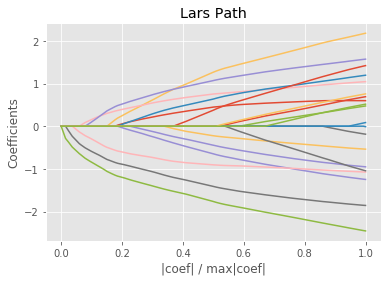

In [21]:
plot_lars(lars_path[2][plot_range,:], lines=False, title="Lars Path")

In [22]:
active_sets = lars_path[2]
active_sets.shape
index_lars = (lars_path[2]!=0)*1
index_lasso = (lasso_path[2]!=0)*1
index_lasso.shape, index_lars.shape
#Only one difference

((100, 103), (100, 102))

In [23]:
for k in range(102):
    if np.sum(index_lasso[:, k] != index_lars[:, k]) > 0:
        print(k)
        break
        
# this tells us that the lasso path and lars path differs in the 71-th path

70


In [24]:
index_lars[:, 70], np.sum(index_lars[:, 70])

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]), 70)

In [25]:
index_lasso[:, 70], np.sum(index_lasso[:, 70])

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]), 69)

In [26]:
np.where(index_lars[:, 70] != index_lasso[:, 70])

(array([3]),)

In [27]:
index_lars[:, 70] != index_lasso[:, 70]
# this tells us that lasso drops the 4-th coefficient but lars doesn't drop it

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

5\. Below is the figure for test errors. We found that the test error drops first but then increases drastically. This is reasonable, because when $\lambda$ is greater, more coefficients will be dropped and the model will not predict well. The minimum test error happens when $\lambda=0.00094902670035945213$ and $\hat{error}=0.98444992971788303$.

In [28]:
error_resols = []
for i in range(len(lars_path[0])):
    active_set = active_sets[:, i]
    X_restr = X_tr[:, np.where(active_set!=0)[0]]
    X_reste = X_te[:, np.where(active_set!=0)[0]]
    if np.sum(active_set!=0)==0: y_reshat = 0
    else:
        ols = linear_model.LinearRegression(fit_intercept=False)
        ols.fit(X_restr, y_tr)
        y_reshat = ols.predict(X_reste)
    error_resols += [np.mean((y_reshat-y_te)**2)]

In [29]:
lars_path[0][np.argmin(error_resols)], min(error_resols)

(0.0009490267003594509, 0.9844499297178829)

The following is the minimizing active set.

In [35]:
np.where(index_lasso[:,np.argmin(error_resols)]==1)[0]

array([ 0,  1,  2,  3,  5,  8, 27, 38, 50, 52, 53, 68, 69, 76, 77, 78, 80,
       91, 96, 97])

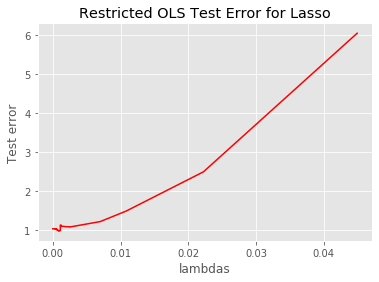

In [30]:
plt.plot(lars_path[0], error_resols, 'r', label = 'Test Error for Lasso')
plt.xlabel('lambdas')
plt.ylabel('Test error')
plt.title('Restricted OLS Test Error for Lasso')
plt.show()

6\. Consider the following plot of the size of the active set versus the test error.  We see a large dip with a local min at an active set of size 4.  I would recommend the active set corresponding to this, which are variables 0,3,5,8.  Alternatively, the 17th active set could be selected which has a smaller test error but larger active set.

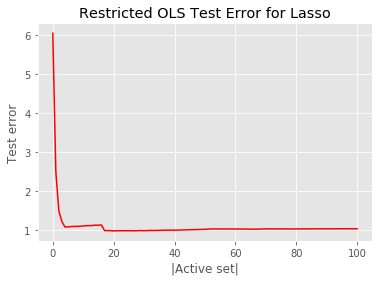

In [48]:
plt.plot((active_sets!=0).sum(axis=0),error_resols, 'r', label = 'Test Error for Lasso')
plt.xlabel('|Active set|')
plt.ylabel('Test error')
plt.title('Restricted OLS Test Error for Lasso')
plt.show()

In [53]:
error_resols[4],np.where(active_sets[:,4]!=0)[0]

(1.0839314502908783, array([0, 3, 5, 8]))

In [58]:
error_resols[17],np.where(active_sets[:,17]!=0)[0]

(0.9917684275312874,
 array([ 0,  1,  2,  3,  5,  8, 27, 38, 50, 52, 69, 77, 78, 80, 91, 96, 97]))